In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
file_path="C:\\Users\\Bhavani\Downloads\matches.csv"

In [16]:
df=pd.read_csv(file_path)

In [17]:
# Basic Info
shape = df.shape
columns = df.columns.tolist()
data_types = df.dtypes

# Missing Values
missing_values = df.isnull().sum()

# Summary Statistics
summary_stats = df.describe(include="all")

# Store results
eda_results = {
    "Shape": shape,
    "Columns": columns,
    "Data Types": data_types,
    "Missing Values": missing_values,
    "Summary Statistics": summary_stats
}

print(eda_results)


{'Shape': (1095, 20), 'Columns': ['id', 'season', 'city', 'date', 'match_type', 'player_of_match', 'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result', 'result_margin', 'target_runs', 'target_overs', 'super_over', 'method', 'umpire1', 'umpire2'], 'Data Types': id                   int64
season              object
city                object
date                object
match_type          object
player_of_match     object
venue               object
team1               object
team2               object
toss_winner         object
toss_decision       object
winner              object
result              object
result_margin      float64
target_runs        float64
target_overs       float64
super_over          object
method              object
umpire1             object
umpire2             object
dtype: object, 'Missing Values': id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match     

In [28]:
df.drop(columns=['method'], inplace=True)

In [29]:
sns.set_style("whitegrid")

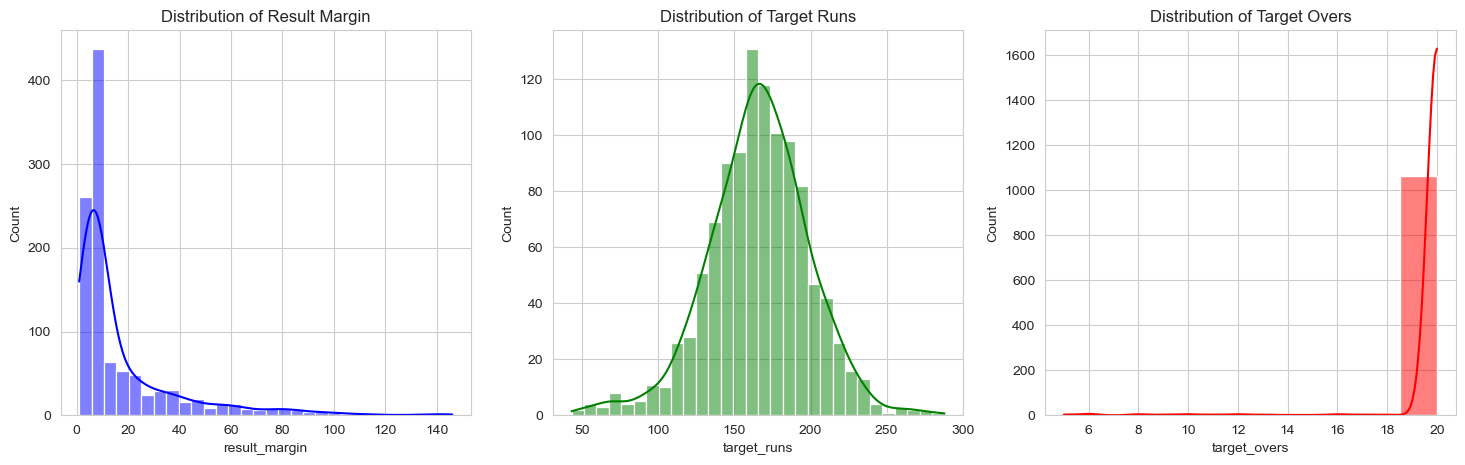

In [34]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
if 'result_margin' in df.columns and df['result_margin'].notna().sum() > 0:
    sns.histplot(df['result_margin'].dropna(), bins=30, kde=True, ax=axes[0], color='blue')
    axes[0].set_title("Distribution of Result Margin")
else:
    axes[0].text(0.5, 0.5, "No Data", fontsize=12, ha='center')

if 'target_runs' in df.columns and df['target_runs'].notna().sum() > 0:
    sns.histplot(df['target_runs'].dropna(), bins=30, kde=True, ax=axes[1], color='green')
    axes[1].set_title("Distribution of Target Runs")
else:
    axes[1].text(0.5, 0.5, "No Data", fontsize=12, ha='center')

if 'target_overs' in df.columns and df['target_overs'].notna().sum() > 0:
    sns.histplot(df['target_overs'].dropna(), bins=10, kde=True, ax=axes[2], color='red')
    axes[2].set_title("Distribution of Target Overs")
else:
    axes[2].text(0.5, 0.5, "No Data", fontsize=12, ha='center')

In [36]:
sns.histplot(df['result_margin'].dropna(), bins=30, kde=True, ax=axes[0], color='blue')
axes[0].set_title("Distribution of Result Margin")
sns.histplot(df['target_runs'].dropna(), bins=30, kde=True, ax=axes[1], color='green')
axes[1].set_title("Distribution of Target Runs")
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

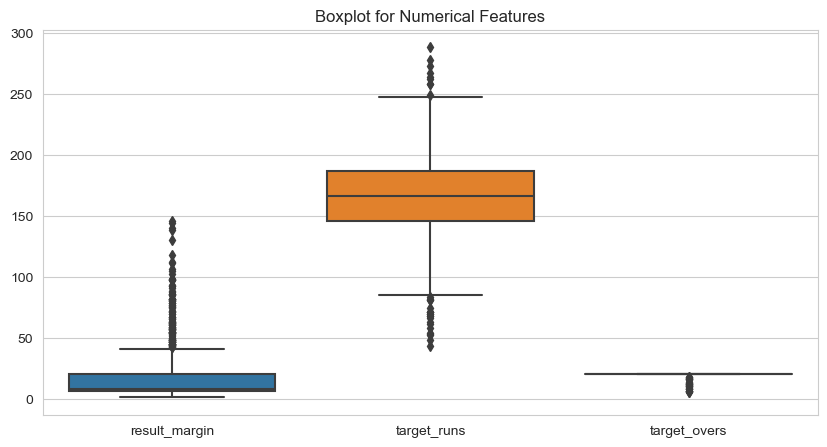

In [23]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=df[['result_margin', 'target_runs', 'target_overs']], ax=ax)
ax.set_title("Boxplot for Numerical Features")
plt.show()

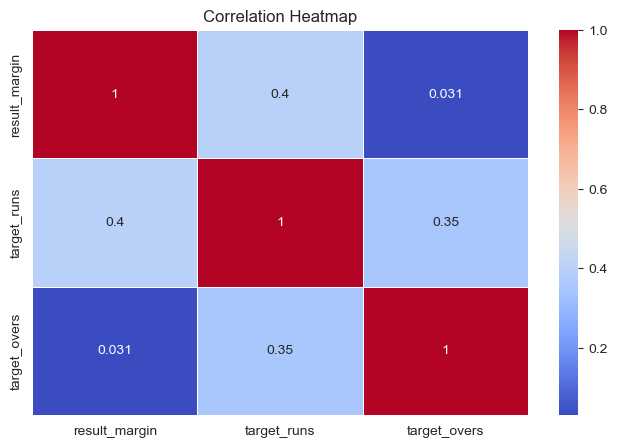

In [24]:
plt.figure(figsize=(8, 5))
sns.heatmap(df[['result_margin', 'target_runs', 'target_overs']].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

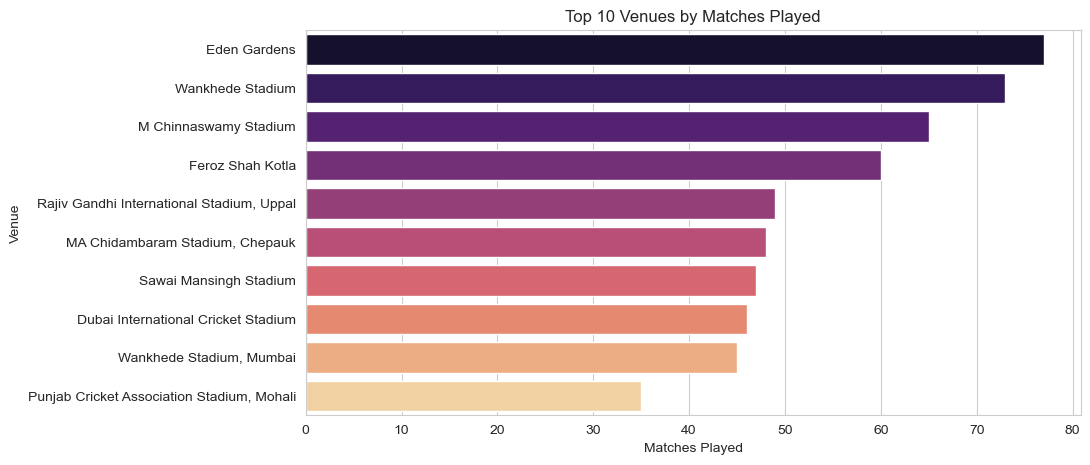

In [25]:
top_venues = df['venue'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_venues.values, y=top_venues.index, palette="magma")
plt.xlabel("Matches Played")
plt.ylabel("Venue")
plt.title("Top 10 Venues by Matches Played")
plt.show()

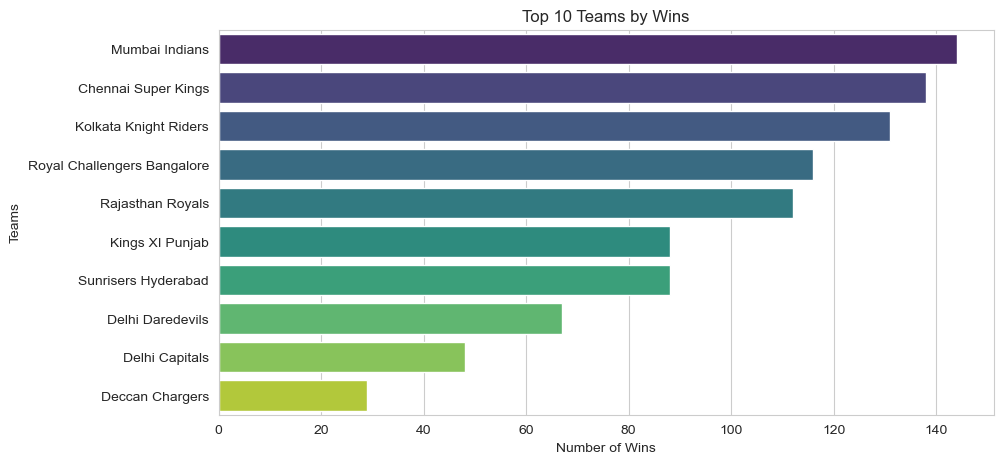

In [27]:
top_teams = df['winner'].value_counts().head(10)

# Bar plot for top teams
plt.figure(figsize=(10, 5))
sns.barplot(x=top_teams.values, y=top_teams.index, palette="viridis")
plt.xlabel("Number of Wins")
plt.ylabel("Teams")
plt.title("Top 10 Teams by Wins")
plt.show()